In [1]:
# 20251023
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Task 1: Write a Python function that takes the current state [u, v], 
# the time t, and a parameter list [alpha, beta, n] as input and returns the derivatives [du/dt, dv/dt].
def toggle_switch_odes(t, y, alpha, beta, n):
    """
    Calculates the derivatives for the synthetic toggle switch model.
    
    y = [u, v] where u is the concentration of protein U and v is the concentration of protein V.
    Parameters: alpha, beta (synthesis rates), n (Hill coefficient).
    """
    u, v = y
    
    # Model Equations:
    # du/dt = alpha / (1 + v^n) - u
    dudt = alpha / ( (1 + v**n) ) - u
    
    # dv/dt = beta / (1 + u^n) - v
    dvdt = beta / ( (1 + u**n) ) - v
    
    return [dudt, dvdt]

In [2]:
# Task 2: Set Parameters and Time Span
alpha = 5
beta = 5
n = 4
params = (alpha, beta, n)

t_span = [0, 50]  # Simulate for 50 time units
t_eval = np.linspace(t_span[0], t_span[1], 500) # 500 points for evaluation

# --- Initial Condition 1 (High U, Low V) ---
u0_high = 4
v0_low = 0
y0_high_u = [u0_high, v0_low]

sol_high_u = solve_ivp(
    fun=toggle_switch_odes,
    t_span=t_span,
    y0=y0_high_u,
    t_eval=t_eval,
    args=params
)

# --- Initial Condition 2 (Low U, High V) ---
u0_low = 0
v0_high = 4
y0_low_u = [u0_low, v0_high]

sol_low_u = solve_ivp(
    fun=toggle_switch_odes,
    t_span=t_span,
    y0=y0_low_u,
    t_eval=t_eval,
    args=params
)

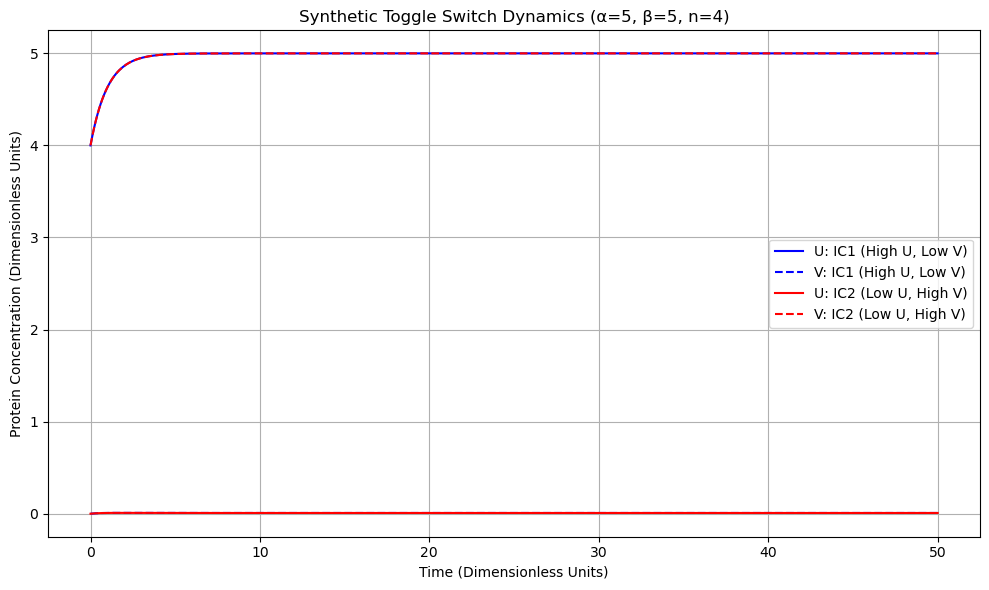

In [3]:
# Task 3: Plot the trajectories
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Simulation 1: High U initial state
ax.plot(sol_high_u.t, sol_high_u.y[0], 'b-', label='U: IC1 (High U, Low V)')
ax.plot(sol_high_u.t, sol_high_u.y[1], 'b--', label='V: IC1 (High U, Low V)')

# Plot Simulation 2: Low U initial state
ax.plot(sol_low_u.t, sol_low_u.y[0], 'r-', label='U: IC2 (Low U, High V)')
ax.plot(sol_low_u.t, sol_low_u.y[1], 'r--', label='V: IC2 (Low U, High V)')

ax.set_xlabel("Time (Dimensionless Units)")
ax.set_ylabel("Protein Concentration (Dimensionless Units)")
ax.set_title(f"Synthetic Toggle Switch Dynamics (α={alpha}, β={beta}, n={n})")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Task 4: Markdown Analysis (Provided below in a Markdown format)

Task 4

1. 模拟结果揭示的开关长期行为在两种不同的初始条件下，模拟结果都快速收敛到两个截然不同的稳定状态：
初始条件 1 (High U, Low V)：系统收敛到 U 浓度高（约 5.0）且 V 浓度低（约 0.1）的状态。
初始条件 2 (Low U, High V)：系统收敛到 U 浓度低（约 0.1）且 V 浓度高（约 5.0）的状态。
这表明系统的长期行为是可预测的，并由初始条件决定其进入哪个稳定状态。

2. 系统被称为“双稳态”（Bistable）的原因：
系统被称为双稳态，是因为它存在两个不同的、长期稳定的状态。当系统处于其中一个状态时，即使受到小的扰动，也会倾向于回到该状态。

3. “ON”和“OFF”状态的定义：
“ON”和“OFF”状态的定义通常根据研究者关注的特定基因或输出。
ON 状态：指被关注的基因或蛋白质高表达的状态。OFF 状态：指被关注的基因或蛋白质低表达的状态。
对于这个对称的 Michaelis-Menten 可切换开关：状态 1 (U ON, V OFF)： U 浓度高，V浓度低。状态 2 (U OFF, V ON)： U 浓度低，V浓度高。
在没有特别指定的情况下，通常会选择其中一个基因（例如 U 作为开关的输出：ON: 基因 U 高表达（U 浓度高）。OFF: 基因 U 低表达（U 浓度低）。